In [130]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Part 1: More lecturing on dataviz

So now we start learning more about the theory of visualization, digging into data encodings and representations.

> Excercise: Some questions for the video
>
> * Mention 10 examples of ways we can encode data
> * Are all encoding created equally? Why not?
> * Explain in your own words: What is the problem with pie-charts?
> * Mention three encodings that are difficult for the human eye to parse? Can you find an example of a visualization online that uses one of those three?
> * What is a "Choropleth"? What does the ancient Greek root of that word "χώρος" mean?

* Different encondings are: Position, Length, Area, Shape, Color, Angle, Line Weight, Line ending, Texture, Pattern

* As visualization facilitates analysis by exploiting the human visual system, not all encodings are created equally. Length for example might attach accordingly to the data presented but Area on the other hand might be created not by the geographic units of the data (like states) and not by the aggregated value presented. 

* The problem with pie-charts exists in the visualization aspect. The encoding of the data is focused of Angle and Area and some times it is hard for the eye to distinquish differences when the numbers are close to each other. The bar graph is a better visualization tenchnique as it is more understandable and more easy to understand diferences.

* Examples of good encodings are position length and texture. A nice example could be a [wordcloud representation](https://global-uploads.webflow.com/59e16042ec229e00016d3a66/5e447232bc2019f1f45a2ee9_word%20cloud%20template%20sample%201.jpeg). 

* A choropleth map (from Greek χῶρος choros 'area/region' and πλῆθος plethos 'multitude') is a type of thematic map in which a set of pre-defined areas is colored or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income. 

> A heat map or isarithmic map is similar but uses regions drawn according to the pattern of the variable, rather than the a priori geographic areas of choropleth maps. The Choropleth is likely the most common type of thematic map because published statistical data (from government or other sources) is generally aggregated into well-known geographic units, such as countries, states, provinces, and counties, and thus they are relatively easy to create using GIS, spreadsheets, or other software tools.

## Part 4: Linear regression

So now it's time for fun with standard linear regression. We'll get into that by asking the following question. 

> *Which pair of focus crimes have the the most similar temporal pattern across the week? (And which pair is most dissimilar).*

Below I list the focus-crimes for your convenience

In [12]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

focuscrimes_lst = [ 'WEAPON LAWS', 'DRUNKENNESS',
                    'TRESPASS','PROSTITUTION',
                    'DRIVING UNDER THE INFLUENCE','BURGLARY',
                    'ROBBERY','DRUG/NARCOTIC',
                    'LARCENY/THEFT','DISORDERLY CONDUCT',
                    'VANDALISM', 'VEHICLE THEFT',
                    'ASSAULT', 'STOLEN PROPERTY']

focuscrimes_lst.sort()

In [70]:
#Picking the filename to import into a pandas dataframe
fileName = 'Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv'

#Importing the dataset
filePath = os.path.abspath(os.path.join(os.getcwd(), '..' ,'social-data-analysis/Datasets', fileName))
Data = pd.read_csv(filePath)

#Removing the 2018 (since we don't have full data for 2018)
Data['Year'] = pd.to_datetime(Data['Date']).dt.to_period('Y')
data = Data[Data['Year'] != '2018'].copy() # drop rows corresponding to 2018
data = Data[Data['Category'].isin(list(focuscrimes))]

In [79]:
def day_to_num(x):
    if(x=='Monday'): return 1
    elif(x=='Tuesday'): return 2
    elif(x=='Wednesday'): return 3
    elif(x=='Thursday'): return 4
    elif(x=='Friday'): return 5
    elif(x=='Saturday'): return 6
    elif(x=='Sunday'): return 7
    else: return -1

data['DayOfWeek_Numeric']   = data['DayOfWeek'].apply(lambda x : day_to_num(x)).astype('int64')
data['Hour']                = pd.to_datetime(data['Time']).dt.hour
h_v   = data['Hour'].values 
d_v   = data['DayOfWeek_Numeric'].values
data['HourOfWeek'] =  (h_v + ((d_v-1)*24) )

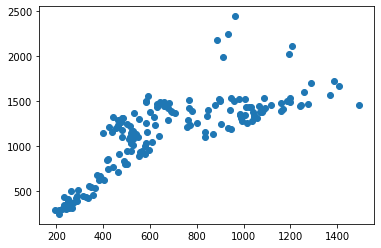

In [81]:
#test
plt.scatter(data.groupby(['Category','HourOfWeek'])['PdId'].count()['VANDALISM'].values, data.groupby(['Category','HourOfWeek'])['PdId'].count()['ASSAULT'].values)

In [141]:
hourCrimesWeekly = data[['Category', 'HourOfWeek']].groupby(['Category','HourOfWeek']).size().unstack()
#hourCrimesWeekly

In [96]:
num_crimes =[]
crimex, crimey = [], []

for i in range(len(focuscrimes_lst)):
    for j in range(i+1, len(focuscrimes_lst)):
        crimex.append(hourCrimesWeekly.index[i])
        crimey.append(hourCrimesWeekly.index[j])
        num_crimes.append([hourCrimesWeekly.iloc[i].values, hourCrimesWeekly.iloc[j].values])
# hourCrimesWeekly.iloc[2].values

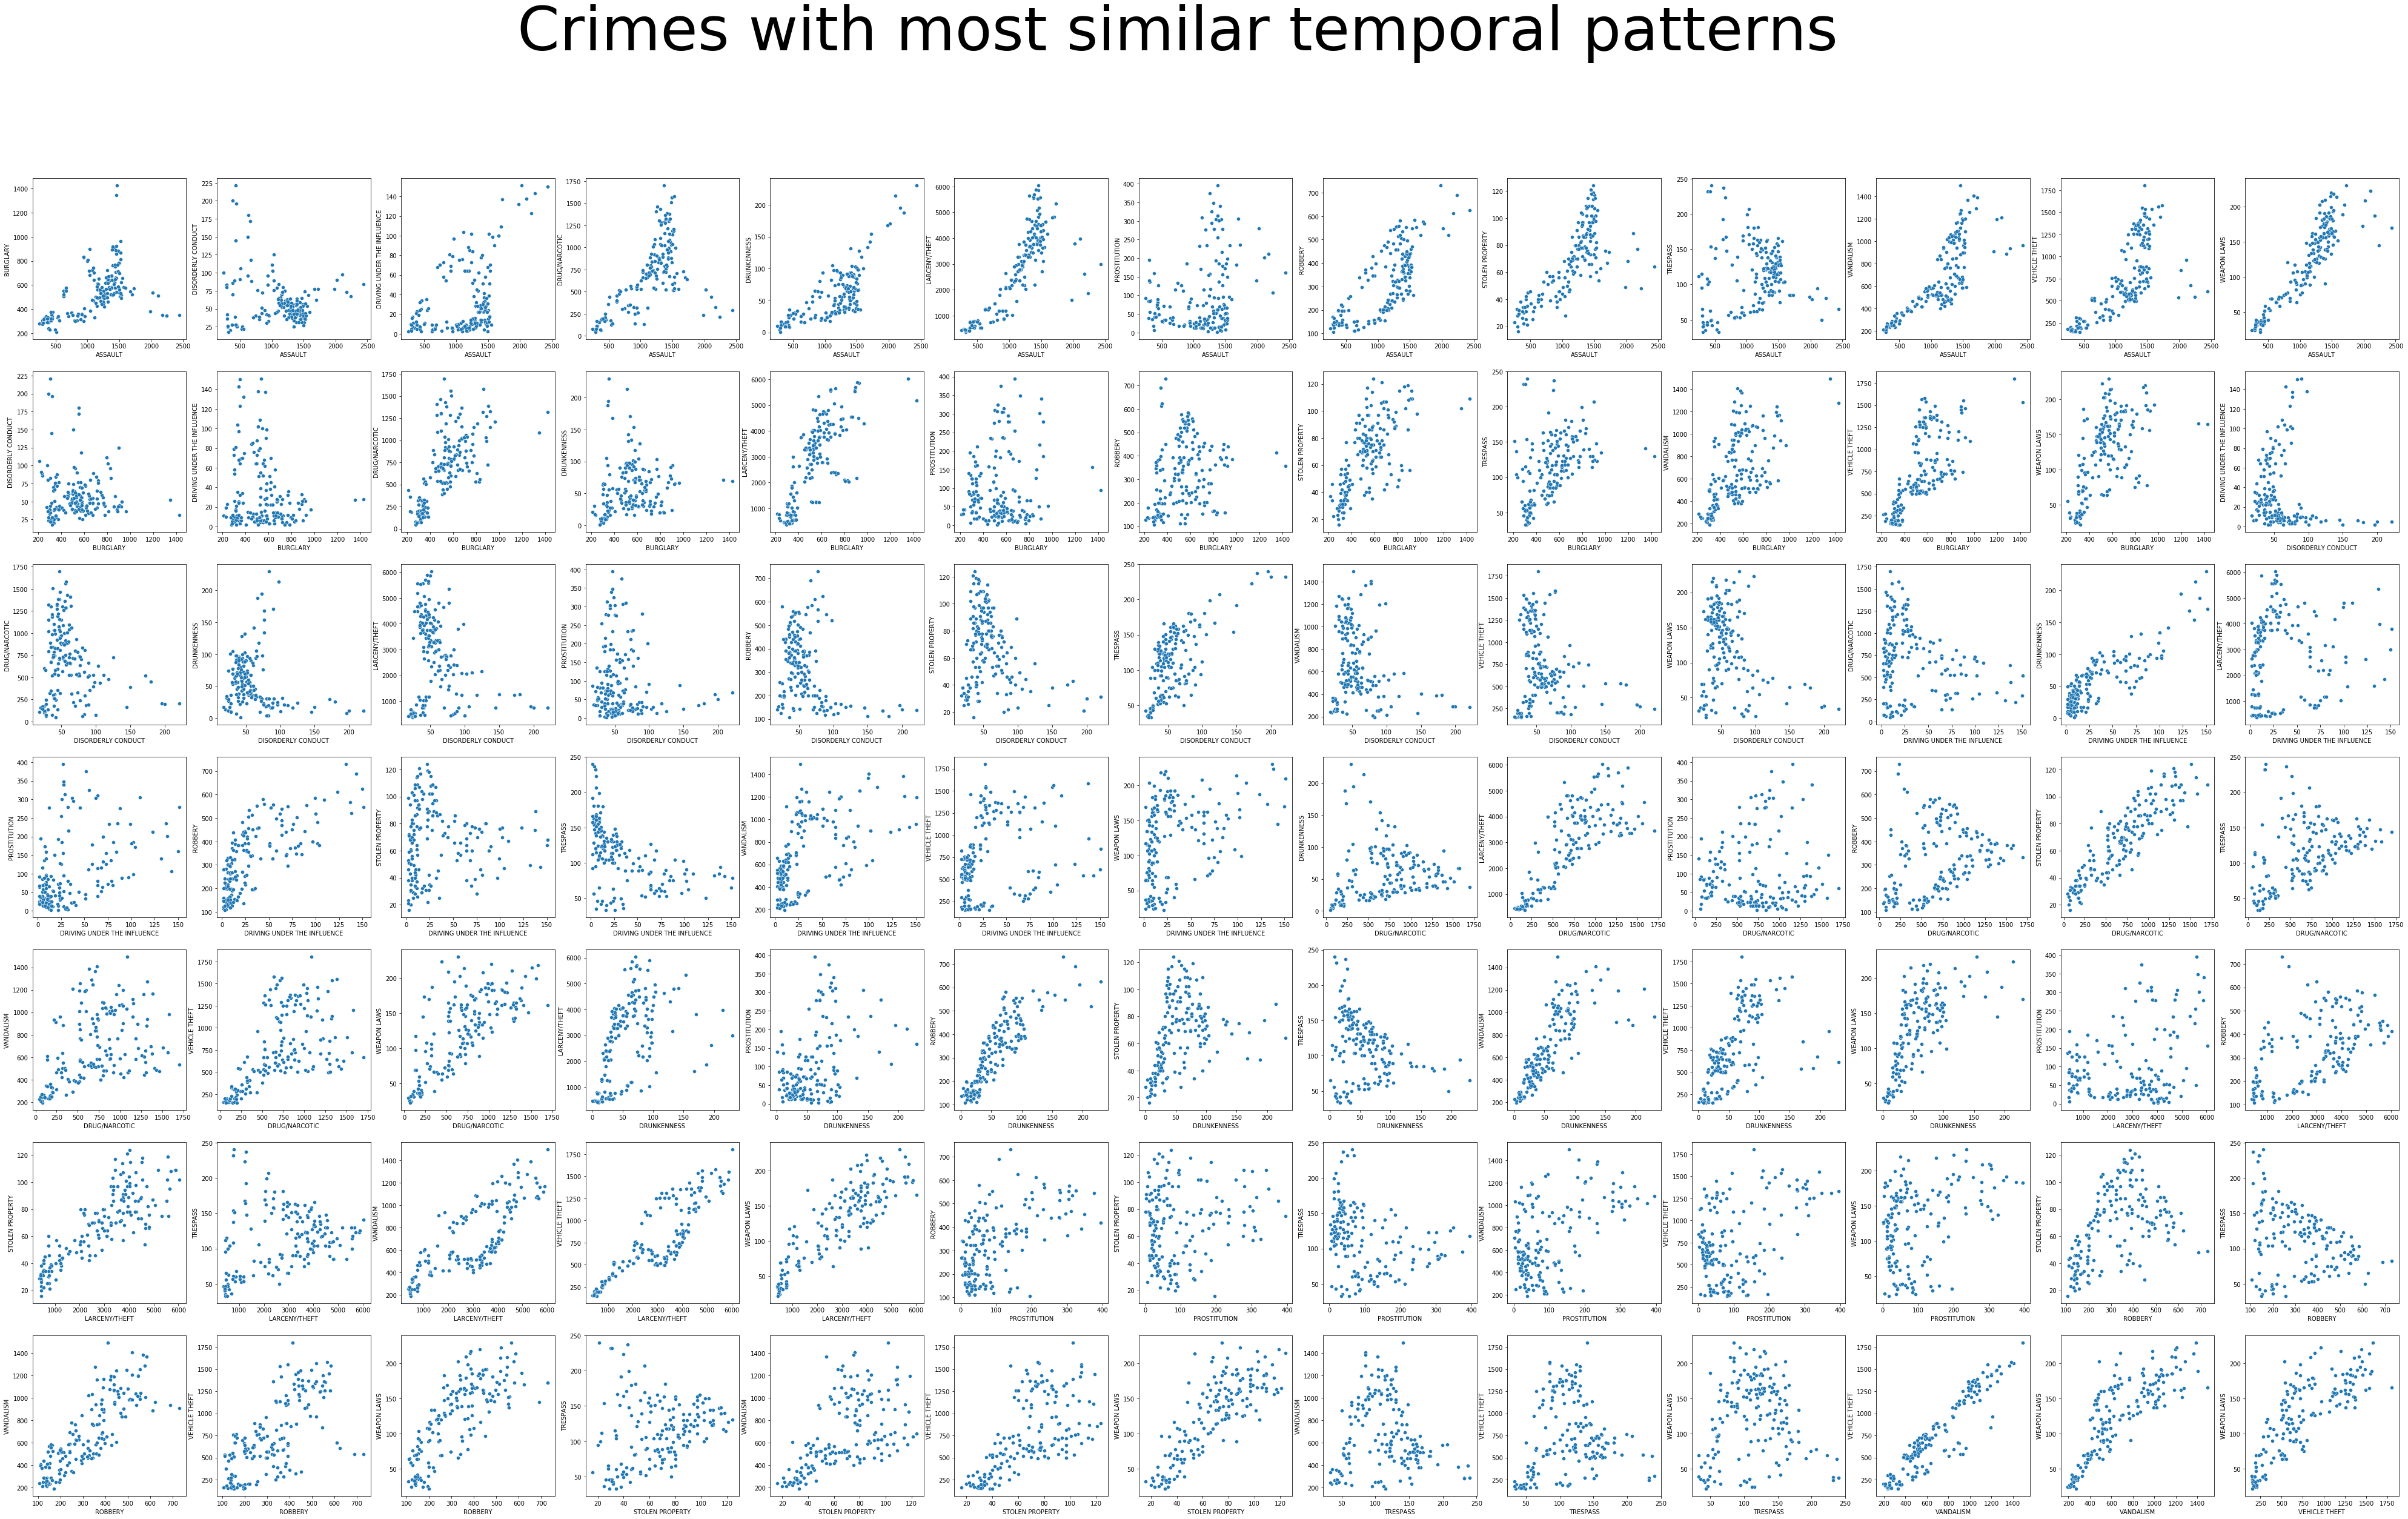

In [140]:
fig, axs = plt.subplots(7, 13,figsize=(70, 40))
fig.suptitle('Crimes with most similar temporal patterns', fontsize=100)

#group_count = data.groupby(['Category','Month'])['PdId'].count()
for i,ax in enumerate(axs.flat):
    sns.scatterplot(num_crimes[i][0], num_crimes[i][1], ax = ax)
    ax.set_ylabel(crimey[i])
    ax.set_xlabel(crimex[i])
    
plt.show()
#     ax.set(title=focuscrimes_lst[i])
#     group_count[focuscrimes_lst[i]].plot(kind='bar',ax=ax, color= 'tab:gray')

# plt.scatter(num_crimes[0][0], num_crimes[0][1])

> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?

**Write here**

In [142]:
def slope_a(x, y):
    a = []
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    sum1 = 0
    sum2 = 0
    for i in range(len(x)):
        sum1 = sum1 + (x[i] * y[i])
        sum2 = sum2 + (np.power(x[i], 2))
        
    term1 = sum1 - (len(x) * x_mean * y_mean)
    term2 = sum2 - (len(x) * pow(x_mean, 2))
    
    result = term1 / term2
    
    return(result)

In [146]:
def b_intercept(x,y,a):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    b = y_mean - (a * x_mean)
    
    return(b)

In [147]:
def y_residuals(x, a, b):
    y = []
    for i in range(len(x)):
        y_i = (a * x[i]) + b
        y.append(y_i)
        
    return(y)

In [149]:
alphas = []
betas = []
ys = []

for k in range(len(num_crimes)):
    a = slope_a(num_crimes[k][0], num_crimes[k][1])
    b = b_intercept(num_crimes[k][0], num_crimes[k][1], a)
    y = y_residuals(num_crimes[k][0], a, b)
    alphas.append(a)
    betas.append(b)
    ys.append(y)

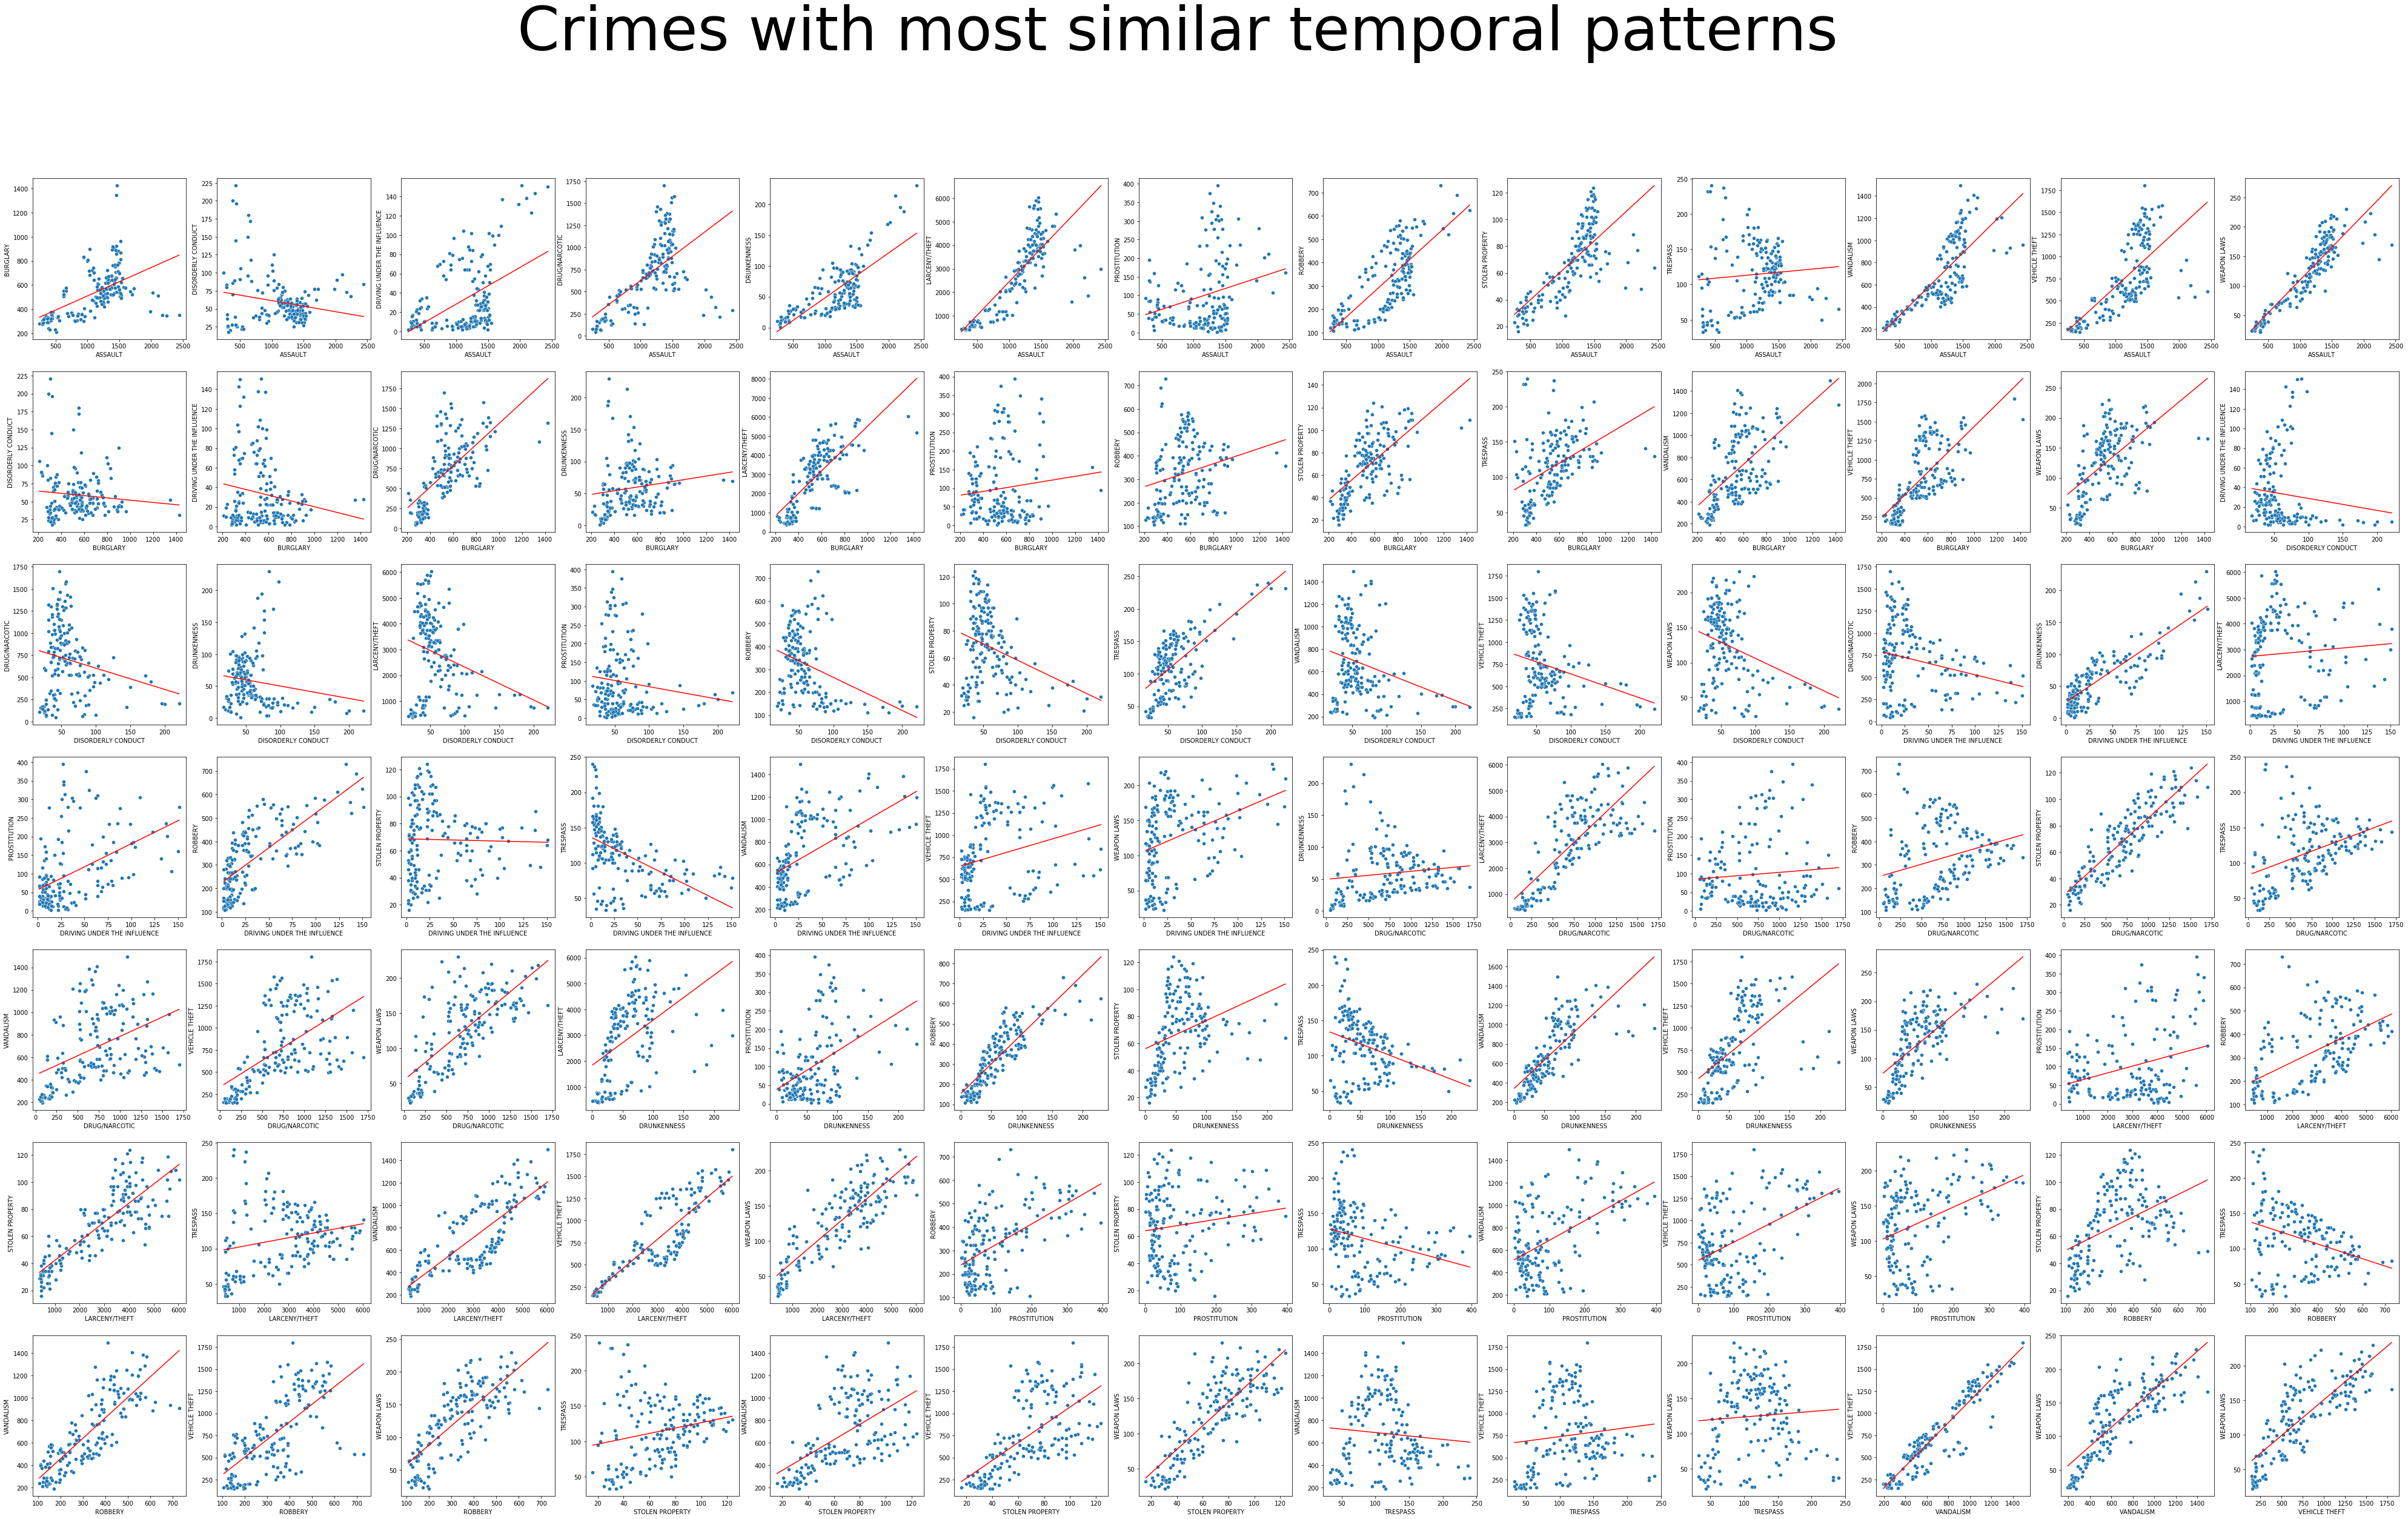

In [150]:
fig, axs = plt.subplots(7, 13,figsize=(70, 40))
fig.suptitle('Crimes with most similar temporal patterns', fontsize=100)

#group_count = data.groupby(['Category','Month'])['PdId'].count()
for i,ax in enumerate(axs.flat):
    sns.scatterplot(num_crimes[i][0], num_crimes[i][1], ax = ax)
    sns.lineplot(num_crimes[i][0], ys[i], ax = ax, color='red')
    ax.set_ylabel(crimey[i])
    ax.set_xlabel(crimex[i])
    
plt.show()

### Goodness of fit as a measure of correlation

But the question we started with was "Which pair of focus crimes have the the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. You probably also remember this one. 

Basically $R^2$ is a measurea of how good a linear fit is. You can [read about $R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise:* 
> * Write a little function to calculate $R^2$ alongside each linear fit.
> * **According to your fits and associated measure of $R^2$, which pair of crimes have the most similar temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?**
> * According to your fits and associated measure of $R^2$, which pair of crimes have the most **dis**similar temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * Explain the connection between $R^2$ and the (Pearson correlation coefficient)[https://en.wikipedia.org/wiki/Pearson_correlation_coefficient].
> * And speaking of correlations. In your words, explain the [Spearman correlation](https://en.wikipedia.org/wiki/Spearman's_rank_correlation_coefficient)? How is it different for the Pearson correlation?

In [152]:
def r_squared(y, f):
    y_mean = np.mean(y)
    sumres = 0
    sumtot = 0
    for i in range(len(y)):
        sumres = sumres + pow((y[i] - f[i]), 2)
        sumtot = sumtot + pow((y[i] - y_mean), 2)
        
    r = 1 - (sumres / sumtot)
    
    return(r)

In [157]:
r_squared_scores = []
for i in range(len(num_crimes)):
    r_squared_scores.append(r_squared(num_crimes[i][1], ys[i]))

In [159]:
max_value = max(r_squared_scores)
index_of_max = r_squared_scores.index(max_value)
print('Elements with max R^2: ' + crimex[index_of_max] + ', ' + crimey[index_of_max])

Elements with max R^2: VANDALISM, VEHICLE THEFT


> * Explain the connection between $R^2$ and the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

Hi Arman, are you sure they refer to a "coefficient of regression" (R)? It think it would make more sense if they referred to Pearson's correlation coefficient (r). In that case the coefficient of determination R^2 would be equal to the square of r. 
Pearson's r is usually used to express the correlation between two quantities. For example let's say you want to demonstrate that the hours spend studying are correlated with the grade obtained in an exam. You could calculate Pearson's r to evaluate whether the two quantities are correlated. 
R^2 is usually used to evaluate the quality of fit of a model on data. It expresses what fraction of the variability of your dependent variable (Y) is explained by your independent variable (X).  

____

Coefficient of determination (R^2)
• The coefficient of determination is a measure of the amount of variance in the dependent variable explained by the independent variable(s). A value of one (1) means perfect explanation and is not encountered in reality due to ever present error. A value of .91 means that 91% of the variance in the dependent variable is explained by the independent variables.
• The amount of variation explained by the regression model should be more than the variation explained by the average. Thus, R2 should be greater than zero.
• R2 is impacted by two facets of the data:
o the number of independent variables relative to the sample size. For this reason, analysts should use the adjusted coefficient of determination, which adjusts for inflation in R2 from overfitting the data.
o the number of independent variables included in the analysis. As you increase the number of independent variables in the model, you increase the R2 automatically because the sum of squared errors by regression begins to approach the sum of squared errors about the average.

___

Also [look](https://zyxue.github.io/2019/03/15/relationship-between-coefficient-of-determination-and-pearson-correlation-coefficient.html)

> * And speaking of correlations. In your words, explain the [Spearman correlation](https://en.wikipedia.org/wiki/Spearman's_rank_correlation_coefficient)? How is it different for the Pearson correlation?

[here](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/)

In [ ]:
# fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
# fig.suptitle('Development of Focus Crimes over Months', fontsize=20)
# group_count = data.groupby(['Category','Month'])['PdId'].count()
# for i,ax in enumerate(axs.flat):
#     ax.set(title=focuscrimes_lst[i])
#     group_count[focuscrimes_lst[i]].plot(kind='bar',ax=ax, color= 'tab:gray')

In [ ]:
# data['Hour'] = pd.to_datetime(data['Time']).dt.hour
# data['Hour'] = data['Hour'].apply(lambda x: str(x)+"-"+str(x+1))
# cats = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13',
#         '13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24']
# data['Hour'] = pd.Categorical(data['Hour'], categories=cats, ordered=True)

In [ ]:
# (
# data.groupby(['Category','HourOfWeek'])['PdId'].count()
# ['WEAPON LAWS']
# .plot(figsize=(5,5))
# )


In [ ]:
# fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
# fig.suptitle('Development of Focus Crimes over Week hours', fontsize=20)


# group_count = data.groupby(['Category','HourOfWeek'])['PdId'].count()
# for i,ax in enumerate(axs.flat):
#     ax.set(title=focuscrimes_lst[i])
#     group_count[focuscrimes_lst[i]].plot(ax=ax)